In [1]:
import geopandas
from matplotlib import pyplot as plt
import folium
from mpl_toolkits.axes_grid1 import make_axes_locatable 

In [2]:

#plot the spatial DF as a map:

In [3]:
wa_puma = geopandas.read_file("data/raw/tl_2017_53_puma10.shp")
wa_puma = wa_puma.to_crs(epsg='3857') # convert shape file data to web mercator (ESPG 3857)

In [4]:
def is_county(puma):
    
    '''this function takes a string input and checks if it is in the respective list which represent the regions: King County
    and South King County. It returns a 0 for the greater washinton area, 1 for King County areas that are NOT south king county
   and 2 for South King County. It is meant to use as apart of a .map(lambda) style syntax to apply across a Pandas Datafram.'''
   
    king_counties = ['11601', '11602', '11603','11606', '11607', '11608', '11609', '11610', '11611', '11612', '11613', '11614', '11615', '11616'] 
    s_king_counties = ['11610', '11613', '11614', '11615', '11611', '11612', '11604','11605']
    if puma in s_king_counties:
        return 2
    elif puma in king_counties:
        return 1
    else:
        return 0



In [5]:
#Creating a new column to classify each puma as either Washington, King County, or South King County
wa_puma["king_county"]=wa_puma["PUMACE10"].map(lambda x: is_county(x))
wa_puma.head()

STATEFP10 PUMACE10  GEOID10  \
0        53    10200  5310200   
1        53    10100  5310100   
2        53    10400  5310400   
3        53    10504  5310504   
4        53    10503  5310503   

                                          NAMELSAD10 MTFCC10 FUNCSTAT10  \
0            Skagit, Island & San Juan Counties PUMA   G6120          S   
1               Whatcom County--Bellingham City PUMA   G6120          S   
2  Stevens, Okanogan, Pend Oreille & Ferry Counti...   G6120          S   
3           Spokane County (Outer)--Cheney City PUMA   G6120          S   
4  Spokane County (East Central)--Greater Spokane...   G6120          S   

       ALAND10    AWATER10   INTPTLAT10    INTPTLON10  \
0   5470622131  2441658886  +48.4470835  -122.1737477   
1   5459332804  1028183246  +48.8426531  -121.8364325   
2  29389124389   489162432  +48.5031090  -118.7866777   
3   3983412021    35812133  +47.5972847  -117.1210417   
4    270926976     5004332  +47.6561281  -117.1818649   

                                            geometry  king_county  
0  POLYGON ((-13630427.776 6214883.579, -13629607...            0  
1  POLYGON ((-13626220.233 6275252.513, -13626192...            0  
2  POLYGON ((-13152240.431 6088021.096, -13152284...            0  
3  POLYGON ((-13036099.694 6042245.642, -13036098...            0  
4  POLYGON ((-13041672.570 6057042.051, -13041645...            0

Text(0.5, 1, 'King County Puma')

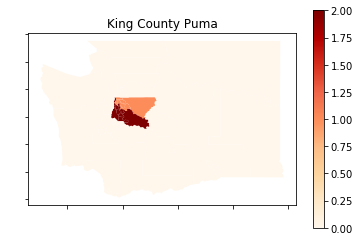

In [34]:
#Create a map to diplay the King County classified data. 

fig, ax = plt.subplots(1,1)


wa_puma.plot(column = "king_county", ax=ax, legend = True, cmap = "OrRd" );

ax.set_yticklabels([])
ax.set_ylabel(" ")

ax.set_xticklabels([])
ax.set_xlabel(' ')

ax.set_title("King County Puma")


In [7]:
# using folium for basemap 



m = folium.Map([47.6485, -122.3502], zoom_start=10)

folium.GeoJson(
    wa_puma,
).add_to(m)

# m.save(os.path.join('results', 'GeoJSON_and_choropleth_3.html'))

m

# data_map.save('data_map.html')

In [8]:
my_map = folium.Map(location=[45.372, -121.6972],
                    zoom_start=12,
                    tiles='2017-07-03_washington_seattle.mbtiles', attr='Mapbox Attribution',
                    )
my_map

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [11]:
#create DF with just the counties of interest 
s_king_df = wa_puma.loc[wa_puma['king_county']==2]

In [15]:
sm = folium.Map([47.6485, -122.3502], zoom_start=10)

folium.GeoJson(
    s_king_df,
).add_to(sm)

sm

In [35]:
import mapclassify

/Users/brentsair/anaconda3/envs/oy-env/lib/python3.7/site-packages/mapclassify/classifiers.py:1666: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/Users/brentsair/anaconda3/envs/oy-env/lib/python3.7/site-packages/mapclassify/classifiers.py:1667: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % uvk, UserWarning)


Text(0.5, 1, 'King County Puma')

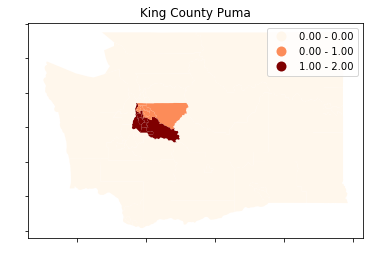

In [44]:
fig, ax = plt.subplots(1,1)


wa_puma.plot(column = "king_county", ax=ax, legend = True, cmap = "OrRd", scheme = 'natural_breaks' );

ax.set_yticklabels([])
ax.set_ylabel(" ")

ax.set_xticklabels([])
ax.set_xlabel(' ')

ax.set_title("King County Puma")